In [3]:
pip install tensorflow



SyntaxError: invalid syntax (3731576801.py, line 1)

In [4]:
pip install pandas

     ---------------------------------------- 11.6/11.6 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 507.9/507.9 kB 5.4 MB/s eta 0:00:00
     -------------------------------------- 346.8/346.8 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install matplotlib

     ---------------------------------------- 8.0/8.0 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 219.8/219.8 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 72.0/72.0 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 107.7/107.7 kB 6.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Load the training and testing datasets from CSV files
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Separate features (pixel values) and labels
x_train = train_data.iloc[:, 1:].values  # All columns except the first (labels)
y_train = train_data.iloc[:, 0].values   # First column is the label
x_test = test_data.iloc[:, 1:].values    # All columns except the first (labels)
y_test = test_data.iloc[:, 0].values     # First column is the label

# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to fit the model (flattened 28x28 images)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# Define the baseline model
def create_baseline_model():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the model
baseline_model = create_baseline_model()
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
baseline_history = baseline_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8091 - loss: 0.6743 - val_accuracy: 0.9469 - val_loss: 0.1846
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9520 - loss: 0.1619 - val_accuracy: 0.9604 - val_loss: 0.1309
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9695 - loss: 0.1079 - val_accuracy: 0.9666 - val_loss: 0.1113
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9762 - loss: 0.0823 - val_accuracy: 0.9688 - val_loss: 0.1014
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9822 - loss: 0.0615 - val_accuracy: 0.9716 - val_loss: 0.0948
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9848 - loss: 0.0492 - val_accuracy: 0.9711 - val_loss: 0.0991
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9876 - loss: 0.0413 - val_accuracy: 0.9719 - val_loss: 0.0922
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9912 - loss: 0.0299 - val_accuracy: 0.

In [7]:
# Define the model with L1 regularization
def create_l1_model():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,), kernel_regularizer='l1'),
        layers.Dense(64, activation='relu', kernel_regularizer='l1'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the model
l1_model = create_l1_model()
l1_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
l1_history = l1_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4983 - loss: 15.4847 - val_accuracy: 0.7837 - val_loss: 1.5792
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7913 - loss: 1.5301 - val_accuracy: 0.8382 - val_loss: 1.3524
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8313 - loss: 1.3559 - val_accuracy: 0.8559 - val_loss: 1.2559
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8505 - loss: 1.2725 - val_accuracy: 0.8684 - val_loss: 1.1892
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8575 - loss: 1.2120 - val_accuracy: 0.8753 - val_loss: 1.1420
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8666 - loss: 1.1576 - val_accuracy: 0.8766 - val_loss: 1.0970
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8658 - loss: 1.1278 - val_accuracy: 0.8786 - val_loss: 1.0725
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8716 - loss: 1.0960 - val_accuracy: 0

In [8]:
# Define the model with L2 regularization
def create_l2_model():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,), kernel_regularizer='l2'),
        layers.Dense(64, activation='relu', kernel_regularizer='l2'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the model
l2_model = create_l2_model()
l2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
l2_history = l2_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8001 - loss: 2.0766 - val_accuracy: 0.9178 - val_loss: 0.6468
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9178 - loss: 0.6243 - val_accuracy: 0.9325 - val_loss: 0.5253
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9262 - loss: 0.5290 - val_accuracy: 0.9355 - val_loss: 0.4829
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9325 - loss: 0.4840 - val_accuracy: 0.9438 - val_loss: 0.4470
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9373 - loss: 0.4555 - val_accuracy: 0.9445 - val_loss: 0.4174
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9412 - loss: 0.4312 - val_accuracy: 0.9513 - val_loss: 0.3981
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9434 - loss: 0.4136 - val_accuracy: 0.9517 - val_loss: 0.3843
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9483 - loss: 0.3885 - val_accuracy: 0.

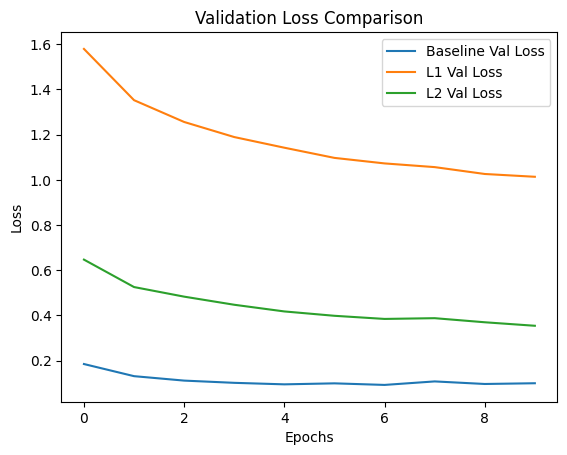

In [11]:
import matplotlib.pyplot as plt

# Plot the training and validation loss for each model
plt.plot(baseline_history.history['val_loss'], label='Baseline Val Loss')
plt.plot(l1_history.history['val_loss'], label='L1 Val Loss')
plt.plot(l2_history.history['val_loss'], label='L2 Val Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

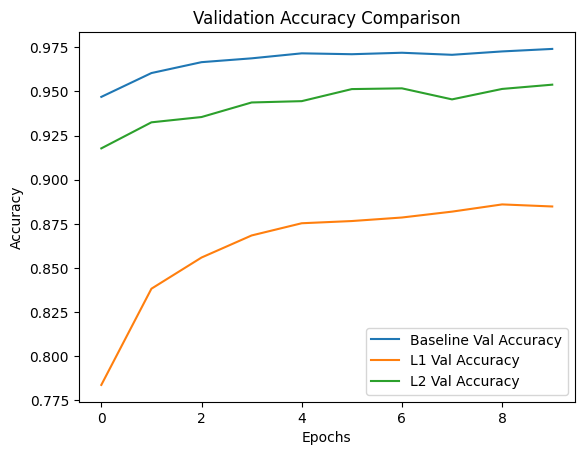

In [12]:
# Plot the training and validation accuracy for each model
plt.plot(baseline_history.history['val_accuracy'], label='Baseline Val Accuracy')
plt.plot(l1_history.history['val_accuracy'], label='L1 Val Accuracy')
plt.plot(l2_history.history['val_accuracy'], label='L2 Val Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

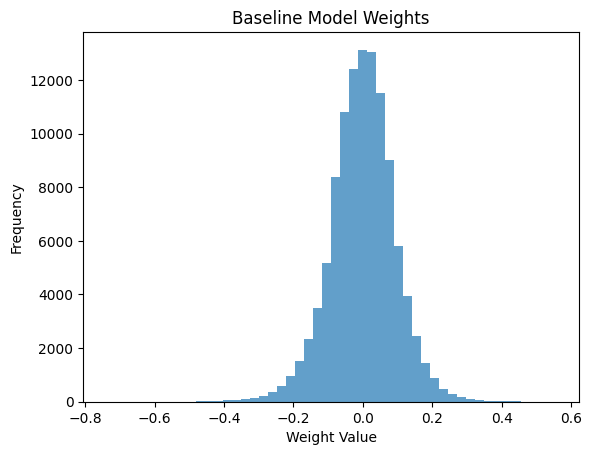

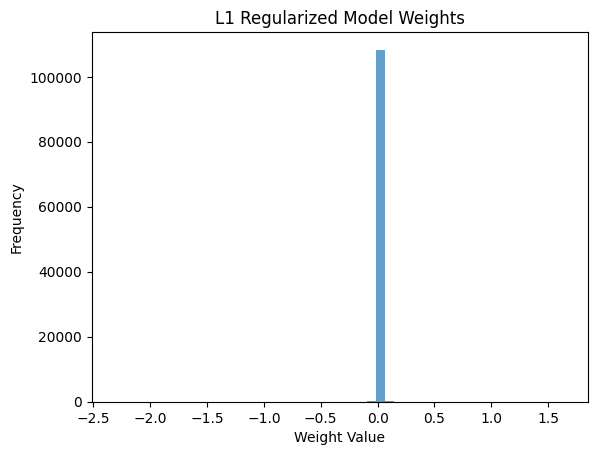

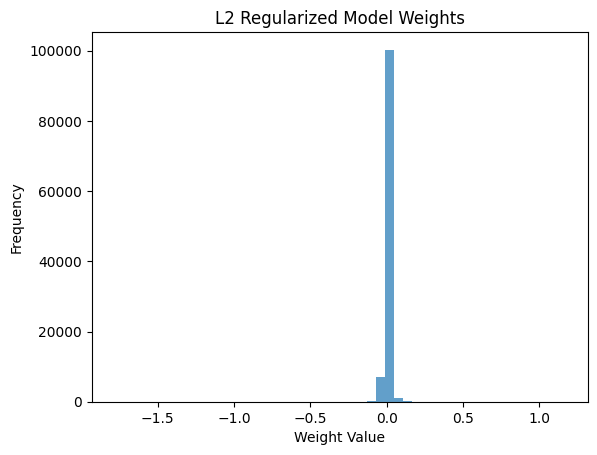

In [13]:
# Function to plot weight distributions
def plot_weight_distribution(model, title):
    weights = []
    for layer in model.layers:
        if isinstance(layer, layers.Dense):
            weights.extend(layer.get_weights()[0].flatten())
    plt.hist(weights, bins=50, alpha=0.7)
    plt.title(title)
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.show()

# Plot weight distributions
plot_weight_distribution(baseline_model, 'Baseline Model Weights')
plot_weight_distribution(l1_model, 'L1 Regularized Model Weights')
plot_weight_distribution(l2_model, 'L2 Regularized Model Weights')